# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

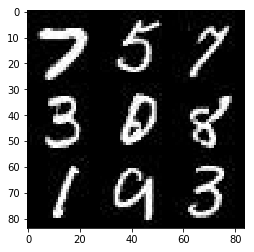

In [2]:
show_n_images = 9

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

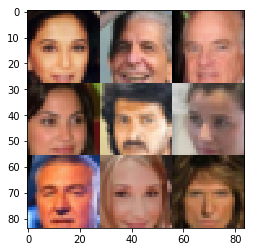

In [3]:
show_n_images = 9

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, shape=(None, image_height, image_width, image_channels))
    input_z = tf.placeholder(tf.float32, shape=(None, z_dim))
    learning_rate = tf.placeholder(tf.float32, shape=())

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha = 0.1):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
   
    with tf.variable_scope('discriminator', reuse=reuse):
        x = tf.layers.conv2d(images,64, 5, 2,'same', use_bias=False, activation=None,kernel_initializer=tf.contrib.layers.xavier_initializer())
        x = tf.maximum(alpha * x, x)
       # x = tf.nn.dropout(x, 0.8)
        
        x = tf.layers.conv2d(x,128, 5, 2,'same', use_bias=False, activation=None,kernel_initializer=tf.contrib.layers.xavier_initializer())
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(alpha * x, x)
       # x = tf.nn.dropout(x, 0.8)
        
        x = tf.layers.conv2d(x, 256, 5, 2,'same', use_bias=False, activation=None,kernel_initializer=tf.contrib.layers.xavier_initializer())
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(alpha * x, x)
        #x = tf.nn.dropout(x, 0.8)

        #x = tf.layers.conv2d(x, 256, 5, 2,'same', use_bias=False, activation=None,kernel_initializer=tf.contrib.layers.xavier_initializer())
        #x = tf.layers.batch_normalization(x, training=True)
        #x = tf.maximum(alpha * x, x)
        #x = tf.nn.dropout(x, 0.8)
        
        x_flat = tf.reshape(x, (-1, 4*4*256))
        logits = tf.layers.dense(x_flat, 1, activation=None)
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True,alpha = 0.1):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        x = tf.layers.dense(z, 3*3*512, use_bias=False, activation=None)
        x = tf.reshape(x, (-1, 3, 3, 256))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        x = tf.nn.dropout(x, 0.5)
 
        
        x = tf.layers.conv2d_transpose(x, 256, 5, 2,'same', use_bias=False, activation=None,kernel_initializer=tf.contrib.layers.xavier_initializer())
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        x = tf.nn.dropout(x, 0.5)
      
        
        x = tf.layers.conv2d_transpose(x, 128, 5, 2,'same', use_bias=False, activation=None,kernel_initializer=tf.contrib.layers.xavier_initializer())
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        x = tf.nn.dropout(x, 0.5)
     
        #x = tf.layers.conv2d_transpose(x, 128, 5, 2,'same', use_bias=False, activation=None)
        #x = tf.layers.batch_normalization(x, training=is_train)
        #x = tf.maximum(alpha * x, x)
        #x = tf.nn.dropout(x, 0.5)
        
        x = tf.layers.conv2d_transpose(x, out_channel_dim, 6, 2,'valid', activation=None,kernel_initializer=tf.contrib.layers.xavier_initializer())
        out = tf.tanh(x)
   
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * 0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        #d_train_opt= tf.train.GradientDescentOptimizer(learning_rate).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                 # Change the range from (-0.5, 0.5) to (-1, 1) to be consistent with batch_z
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run([d_train_opt, g_train_opt], feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                #changing after reviewer comments
                #_ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})


                if steps % 10== 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_real: batch_images, input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    if steps % 100 == 0:
                        show_generator_output(sess, 15, input_z, data_shape[3], data_image_mode)         
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 5.3268... Generator Loss: 0.0111
Epoch 1/2... Discriminator Loss: 1.6061... Generator Loss: 3.4151
Epoch 1/2... Discriminator Loss: 2.1549... Generator Loss: 2.3955
Epoch 1/2... Discriminator Loss: 1.4391... Generator Loss: 1.5940
Epoch 1/2... Discriminator Loss: 1.2807... Generator Loss: 0.8540
Epoch 1/2... Discriminator Loss: 0.8943... Generator Loss: 1.1631
Epoch 1/2... Discriminator Loss: 1.3443... Generator Loss: 2.8079
Epoch 1/2... Discriminator Loss: 1.3877... Generator Loss: 2.9985
Epoch 1/2... Discriminator Loss: 1.2252... Generator Loss: 1.3004
Epoch 1/2... Discriminator Loss: 1.1454... Generator Loss: 1.3340


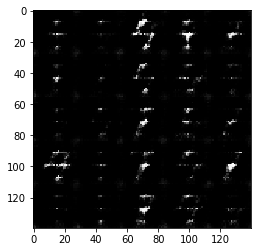

Epoch 1/2... Discriminator Loss: 1.2607... Generator Loss: 2.3827
Epoch 1/2... Discriminator Loss: 1.0200... Generator Loss: 1.4549
Epoch 1/2... Discriminator Loss: 1.2788... Generator Loss: 2.4244
Epoch 1/2... Discriminator Loss: 1.2375... Generator Loss: 1.1539
Epoch 1/2... Discriminator Loss: 1.3633... Generator Loss: 0.6425
Epoch 1/2... Discriminator Loss: 1.0917... Generator Loss: 1.6354
Epoch 1/2... Discriminator Loss: 1.2250... Generator Loss: 2.1692
Epoch 1/2... Discriminator Loss: 1.0205... Generator Loss: 1.5290
Epoch 1/2... Discriminator Loss: 1.3080... Generator Loss: 2.8476
Epoch 1/2... Discriminator Loss: 1.3913... Generator Loss: 0.9087


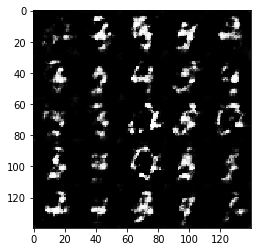

Epoch 1/2... Discriminator Loss: 1.6280... Generator Loss: 0.5201
Epoch 1/2... Discriminator Loss: 1.2796... Generator Loss: 0.9811
Epoch 1/2... Discriminator Loss: 2.0393... Generator Loss: 0.2579
Epoch 1/2... Discriminator Loss: 1.2905... Generator Loss: 1.0033
Epoch 1/2... Discriminator Loss: 1.2192... Generator Loss: 1.1832
Epoch 1/2... Discriminator Loss: 1.2361... Generator Loss: 0.8447
Epoch 1/2... Discriminator Loss: 1.1548... Generator Loss: 1.4237
Epoch 1/2... Discriminator Loss: 1.2093... Generator Loss: 1.6520
Epoch 1/2... Discriminator Loss: 1.2830... Generator Loss: 0.9131
Epoch 1/2... Discriminator Loss: 1.6515... Generator Loss: 0.4020


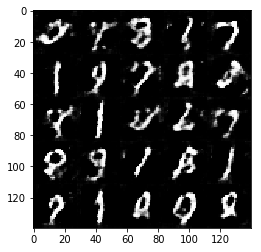

Epoch 1/2... Discriminator Loss: 1.1556... Generator Loss: 1.2215
Epoch 1/2... Discriminator Loss: 1.2069... Generator Loss: 1.5206
Epoch 1/2... Discriminator Loss: 1.3154... Generator Loss: 0.6686
Epoch 1/2... Discriminator Loss: 1.1445... Generator Loss: 1.0326
Epoch 1/2... Discriminator Loss: 1.2896... Generator Loss: 0.6985
Epoch 1/2... Discriminator Loss: 1.1788... Generator Loss: 1.2795
Epoch 1/2... Discriminator Loss: 1.1944... Generator Loss: 1.0017
Epoch 1/2... Discriminator Loss: 1.2730... Generator Loss: 1.7086
Epoch 1/2... Discriminator Loss: 1.1991... Generator Loss: 0.9368
Epoch 1/2... Discriminator Loss: 1.1116... Generator Loss: 0.8946


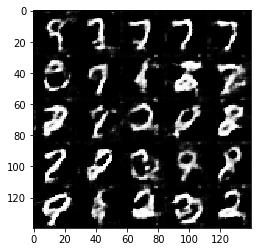

Epoch 1/2... Discriminator Loss: 1.2067... Generator Loss: 1.4866
Epoch 1/2... Discriminator Loss: 1.0979... Generator Loss: 1.1544
Epoch 1/2... Discriminator Loss: 1.2092... Generator Loss: 0.7272
Epoch 1/2... Discriminator Loss: 1.4879... Generator Loss: 0.4635
Epoch 1/2... Discriminator Loss: 1.1137... Generator Loss: 1.1567
Epoch 1/2... Discriminator Loss: 1.1462... Generator Loss: 1.0600
Epoch 2/2... Discriminator Loss: 1.1139... Generator Loss: 0.9573
Epoch 2/2... Discriminator Loss: 1.1579... Generator Loss: 1.3620
Epoch 2/2... Discriminator Loss: 1.0916... Generator Loss: 1.3265
Epoch 2/2... Discriminator Loss: 1.1273... Generator Loss: 1.1848


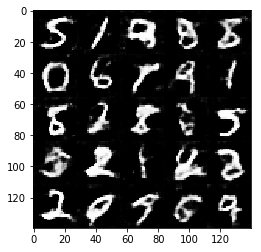

Epoch 2/2... Discriminator Loss: 1.2974... Generator Loss: 0.5828
Epoch 2/2... Discriminator Loss: 1.1362... Generator Loss: 0.8080
Epoch 2/2... Discriminator Loss: 1.3458... Generator Loss: 0.8676
Epoch 2/2... Discriminator Loss: 1.1586... Generator Loss: 1.0538
Epoch 2/2... Discriminator Loss: 1.1329... Generator Loss: 1.3268
Epoch 2/2... Discriminator Loss: 1.5957... Generator Loss: 0.3743
Epoch 2/2... Discriminator Loss: 1.0654... Generator Loss: 1.3737
Epoch 2/2... Discriminator Loss: 1.5649... Generator Loss: 2.5572
Epoch 2/2... Discriminator Loss: 1.1604... Generator Loss: 0.9068
Epoch 2/2... Discriminator Loss: 1.1607... Generator Loss: 1.1298


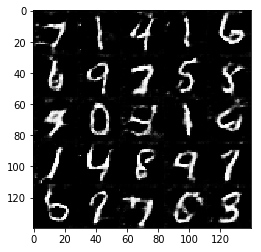

Epoch 2/2... Discriminator Loss: 1.3767... Generator Loss: 0.4910
Epoch 2/2... Discriminator Loss: 1.4385... Generator Loss: 0.4770
Epoch 2/2... Discriminator Loss: 1.9663... Generator Loss: 2.8437
Epoch 2/2... Discriminator Loss: 1.0925... Generator Loss: 1.1522
Epoch 2/2... Discriminator Loss: 1.0955... Generator Loss: 0.8509
Epoch 2/2... Discriminator Loss: 1.0090... Generator Loss: 1.1628
Epoch 2/2... Discriminator Loss: 1.1366... Generator Loss: 0.9477
Epoch 2/2... Discriminator Loss: 1.0398... Generator Loss: 1.0463
Epoch 2/2... Discriminator Loss: 1.0282... Generator Loss: 1.7985
Epoch 2/2... Discriminator Loss: 1.1131... Generator Loss: 1.0544


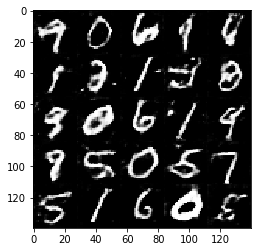

Epoch 2/2... Discriminator Loss: 1.1804... Generator Loss: 0.7177
Epoch 2/2... Discriminator Loss: 1.0521... Generator Loss: 0.8939
Epoch 2/2... Discriminator Loss: 1.0433... Generator Loss: 1.1732
Epoch 2/2... Discriminator Loss: 1.1110... Generator Loss: 0.9326
Epoch 2/2... Discriminator Loss: 1.2903... Generator Loss: 0.6033
Epoch 2/2... Discriminator Loss: 1.1591... Generator Loss: 0.7912
Epoch 2/2... Discriminator Loss: 1.1051... Generator Loss: 1.2319
Epoch 2/2... Discriminator Loss: 1.0267... Generator Loss: 0.9326
Epoch 2/2... Discriminator Loss: 1.0710... Generator Loss: 1.1573
Epoch 2/2... Discriminator Loss: 1.1385... Generator Loss: 0.8411


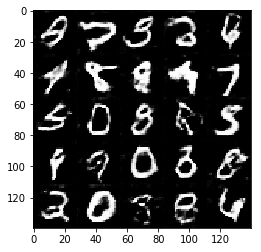

Epoch 2/2... Discriminator Loss: 1.0955... Generator Loss: 1.0238
Epoch 2/2... Discriminator Loss: 1.1101... Generator Loss: 0.7776
Epoch 2/2... Discriminator Loss: 1.0072... Generator Loss: 0.9859
Epoch 2/2... Discriminator Loss: 1.6935... Generator Loss: 1.7782
Epoch 2/2... Discriminator Loss: 1.2622... Generator Loss: 0.8149
Epoch 2/2... Discriminator Loss: 1.0907... Generator Loss: 1.2474
Epoch 2/2... Discriminator Loss: 1.1038... Generator Loss: 1.4240
Epoch 2/2... Discriminator Loss: 1.0988... Generator Loss: 1.5914
Epoch 2/2... Discriminator Loss: 1.1758... Generator Loss: 0.6840
Epoch 2/2... Discriminator Loss: 1.0832... Generator Loss: 1.0373


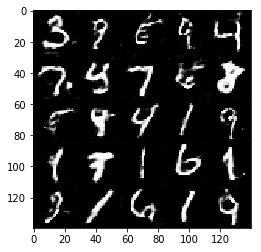

Epoch 2/2... Discriminator Loss: 1.2196... Generator Loss: 0.6584
Epoch 2/2... Discriminator Loss: 1.2419... Generator Loss: 0.6271
Epoch 2/2... Discriminator Loss: 1.1502... Generator Loss: 0.9813


In [36]:
batch_size = 128
z_dim = 64
learning_rate = 0.0012
beta1 = 0.5



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/2... Discriminator Loss: 3.1783... Generator Loss: 13.4071
Epoch 1/2... Discriminator Loss: 1.5314... Generator Loss: 1.1794
Epoch 1/2... Discriminator Loss: 1.1992... Generator Loss: 1.5151
Epoch 1/2... Discriminator Loss: 2.7226... Generator Loss: 4.5302
Epoch 1/2... Discriminator Loss: 1.6010... Generator Loss: 3.2903
Epoch 1/2... Discriminator Loss: 0.9932... Generator Loss: 1.4917
Epoch 1/2... Discriminator Loss: 1.4434... Generator Loss: 0.8980
Epoch 1/2... Discriminator Loss: 1.3468... Generator Loss: 0.8550
Epoch 1/2... Discriminator Loss: 1.0582... Generator Loss: 1.4960
Epoch 1/2... Discriminator Loss: 0.8035... Generator Loss: 1.6880


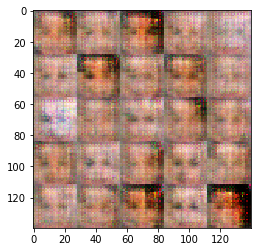

Epoch 1/2... Discriminator Loss: 1.7516... Generator Loss: 1.0704
Epoch 1/2... Discriminator Loss: 0.8527... Generator Loss: 1.2424
Epoch 1/2... Discriminator Loss: 0.9278... Generator Loss: 1.3805
Epoch 1/2... Discriminator Loss: 1.4911... Generator Loss: 1.4530
Epoch 1/2... Discriminator Loss: 1.5216... Generator Loss: 2.0630
Epoch 1/2... Discriminator Loss: 1.4691... Generator Loss: 1.2873
Epoch 1/2... Discriminator Loss: 1.5893... Generator Loss: 1.7462
Epoch 1/2... Discriminator Loss: 1.2561... Generator Loss: 0.9407
Epoch 1/2... Discriminator Loss: 1.6321... Generator Loss: 2.9050
Epoch 1/2... Discriminator Loss: 1.6688... Generator Loss: 0.4190


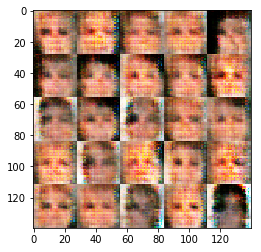

Epoch 1/2... Discriminator Loss: 0.9363... Generator Loss: 1.3149
Epoch 1/2... Discriminator Loss: 1.6684... Generator Loss: 0.6699
Epoch 1/2... Discriminator Loss: 1.3850... Generator Loss: 0.7751
Epoch 1/2... Discriminator Loss: 1.3977... Generator Loss: 0.8120
Epoch 1/2... Discriminator Loss: 1.1613... Generator Loss: 1.0472
Epoch 1/2... Discriminator Loss: 1.2847... Generator Loss: 1.7887
Epoch 1/2... Discriminator Loss: 1.9616... Generator Loss: 0.6618
Epoch 1/2... Discriminator Loss: 1.1135... Generator Loss: 1.0151
Epoch 1/2... Discriminator Loss: 1.3885... Generator Loss: 1.0666
Epoch 1/2... Discriminator Loss: 1.1815... Generator Loss: 0.8978


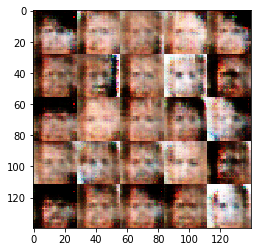

Epoch 1/2... Discriminator Loss: 1.2616... Generator Loss: 1.3540
Epoch 1/2... Discriminator Loss: 1.1941... Generator Loss: 1.0374
Epoch 1/2... Discriminator Loss: 1.2704... Generator Loss: 0.9998
Epoch 1/2... Discriminator Loss: 1.1810... Generator Loss: 0.9229
Epoch 1/2... Discriminator Loss: 1.2103... Generator Loss: 0.7786
Epoch 1/2... Discriminator Loss: 1.0843... Generator Loss: 1.0496
Epoch 1/2... Discriminator Loss: 1.2991... Generator Loss: 0.9074
Epoch 1/2... Discriminator Loss: 1.5553... Generator Loss: 2.1705
Epoch 1/2... Discriminator Loss: 1.3846... Generator Loss: 0.6823
Epoch 1/2... Discriminator Loss: 1.2983... Generator Loss: 1.1807


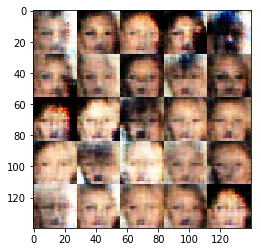

Epoch 1/2... Discriminator Loss: 1.2923... Generator Loss: 1.1903
Epoch 1/2... Discriminator Loss: 1.3944... Generator Loss: 0.5873
Epoch 1/2... Discriminator Loss: 1.1541... Generator Loss: 1.4297
Epoch 1/2... Discriminator Loss: 1.3341... Generator Loss: 1.1234
Epoch 1/2... Discriminator Loss: 1.7044... Generator Loss: 0.3700
Epoch 1/2... Discriminator Loss: 0.9848... Generator Loss: 1.1744
Epoch 1/2... Discriminator Loss: 1.1382... Generator Loss: 0.8373
Epoch 1/2... Discriminator Loss: 0.9268... Generator Loss: 1.6097
Epoch 1/2... Discriminator Loss: 1.3786... Generator Loss: 0.7580
Epoch 1/2... Discriminator Loss: 1.2944... Generator Loss: 0.9241


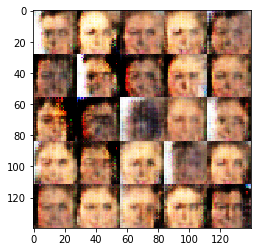

Epoch 1/2... Discriminator Loss: 1.4142... Generator Loss: 0.8475
Epoch 1/2... Discriminator Loss: 1.0422... Generator Loss: 1.3485
Epoch 1/2... Discriminator Loss: 1.2463... Generator Loss: 2.0535
Epoch 1/2... Discriminator Loss: 1.4404... Generator Loss: 0.9018
Epoch 1/2... Discriminator Loss: 1.4776... Generator Loss: 0.5526
Epoch 1/2... Discriminator Loss: 1.4456... Generator Loss: 1.4729
Epoch 1/2... Discriminator Loss: 1.3445... Generator Loss: 0.9570
Epoch 1/2... Discriminator Loss: 1.1906... Generator Loss: 0.8063
Epoch 1/2... Discriminator Loss: 1.2083... Generator Loss: 0.9310
Epoch 1/2... Discriminator Loss: 1.2156... Generator Loss: 1.3008


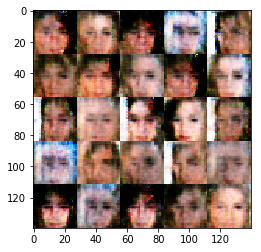

Epoch 1/2... Discriminator Loss: 1.3575... Generator Loss: 0.7492
Epoch 1/2... Discriminator Loss: 1.1766... Generator Loss: 0.8093
Epoch 1/2... Discriminator Loss: 1.0874... Generator Loss: 1.1360
Epoch 1/2... Discriminator Loss: 1.2100... Generator Loss: 1.1215
Epoch 1/2... Discriminator Loss: 1.2527... Generator Loss: 0.7285
Epoch 1/2... Discriminator Loss: 1.4370... Generator Loss: 0.5328
Epoch 1/2... Discriminator Loss: 1.2388... Generator Loss: 1.1118
Epoch 1/2... Discriminator Loss: 1.4348... Generator Loss: 1.5041
Epoch 1/2... Discriminator Loss: 1.1762... Generator Loss: 1.2311
Epoch 1/2... Discriminator Loss: 1.1266... Generator Loss: 1.6601


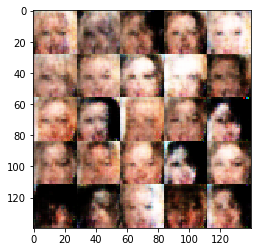

Epoch 1/2... Discriminator Loss: 1.2793... Generator Loss: 1.2219
Epoch 1/2... Discriminator Loss: 1.3234... Generator Loss: 0.9871
Epoch 1/2... Discriminator Loss: 1.3350... Generator Loss: 0.6762
Epoch 1/2... Discriminator Loss: 1.2320... Generator Loss: 1.5212
Epoch 1/2... Discriminator Loss: 1.1324... Generator Loss: 1.1958
Epoch 1/2... Discriminator Loss: 1.2701... Generator Loss: 0.8444
Epoch 1/2... Discriminator Loss: 1.2756... Generator Loss: 0.9479
Epoch 1/2... Discriminator Loss: 1.1652... Generator Loss: 0.9707
Epoch 1/2... Discriminator Loss: 1.2414... Generator Loss: 0.5898
Epoch 1/2... Discriminator Loss: 1.2162... Generator Loss: 0.8264


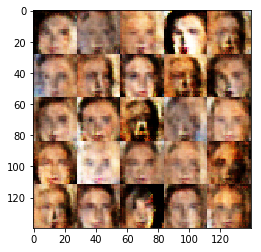

Epoch 1/2... Discriminator Loss: 1.2089... Generator Loss: 0.8868
Epoch 1/2... Discriminator Loss: 1.2413... Generator Loss: 0.9730
Epoch 1/2... Discriminator Loss: 1.3174... Generator Loss: 0.7911
Epoch 1/2... Discriminator Loss: 1.2099... Generator Loss: 0.8701
Epoch 1/2... Discriminator Loss: 1.4350... Generator Loss: 1.7365
Epoch 1/2... Discriminator Loss: 1.2239... Generator Loss: 1.0817
Epoch 1/2... Discriminator Loss: 1.2711... Generator Loss: 0.8976
Epoch 1/2... Discriminator Loss: 1.2557... Generator Loss: 1.4665
Epoch 1/2... Discriminator Loss: 1.6344... Generator Loss: 0.4179
Epoch 1/2... Discriminator Loss: 1.1655... Generator Loss: 1.2100


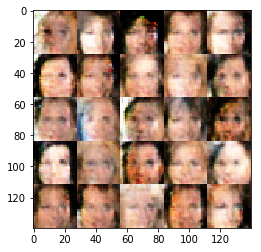

Epoch 1/2... Discriminator Loss: 0.9800... Generator Loss: 1.1902
Epoch 1/2... Discriminator Loss: 1.5958... Generator Loss: 1.9260
Epoch 1/2... Discriminator Loss: 1.2847... Generator Loss: 1.0596
Epoch 1/2... Discriminator Loss: 1.3135... Generator Loss: 0.6094
Epoch 1/2... Discriminator Loss: 1.1852... Generator Loss: 0.7734
Epoch 1/2... Discriminator Loss: 1.3244... Generator Loss: 0.6260
Epoch 1/2... Discriminator Loss: 1.0952... Generator Loss: 1.0043
Epoch 1/2... Discriminator Loss: 1.2710... Generator Loss: 0.9559
Epoch 1/2... Discriminator Loss: 1.3062... Generator Loss: 0.7588
Epoch 1/2... Discriminator Loss: 1.5198... Generator Loss: 0.5007


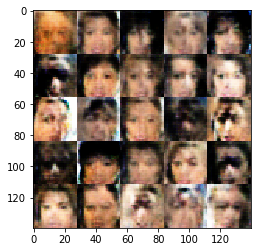

Epoch 1/2... Discriminator Loss: 1.4256... Generator Loss: 0.8798
Epoch 1/2... Discriminator Loss: 1.4040... Generator Loss: 0.7189
Epoch 1/2... Discriminator Loss: 1.2633... Generator Loss: 1.0519
Epoch 1/2... Discriminator Loss: 1.0386... Generator Loss: 0.9656
Epoch 1/2... Discriminator Loss: 1.2995... Generator Loss: 0.8481
Epoch 1/2... Discriminator Loss: 1.1640... Generator Loss: 0.9762
Epoch 1/2... Discriminator Loss: 1.2546... Generator Loss: 0.7086
Epoch 1/2... Discriminator Loss: 1.0734... Generator Loss: 1.1851
Epoch 1/2... Discriminator Loss: 1.3841... Generator Loss: 0.6204
Epoch 1/2... Discriminator Loss: 1.1625... Generator Loss: 0.9986


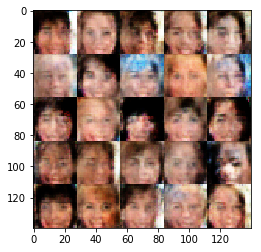

Epoch 1/2... Discriminator Loss: 1.1743... Generator Loss: 0.9789
Epoch 1/2... Discriminator Loss: 1.0770... Generator Loss: 1.0153
Epoch 1/2... Discriminator Loss: 1.4672... Generator Loss: 0.5264
Epoch 1/2... Discriminator Loss: 1.2926... Generator Loss: 1.4158
Epoch 1/2... Discriminator Loss: 1.2943... Generator Loss: 1.3893
Epoch 1/2... Discriminator Loss: 1.0979... Generator Loss: 1.0744
Epoch 1/2... Discriminator Loss: 1.2682... Generator Loss: 1.1622
Epoch 1/2... Discriminator Loss: 1.1414... Generator Loss: 0.7931
Epoch 1/2... Discriminator Loss: 1.5060... Generator Loss: 0.6677
Epoch 1/2... Discriminator Loss: 1.1844... Generator Loss: 0.7919


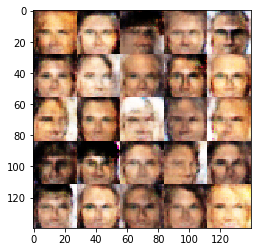

Epoch 1/2... Discriminator Loss: 1.2598... Generator Loss: 0.6351
Epoch 1/2... Discriminator Loss: 1.1547... Generator Loss: 1.1902
Epoch 1/2... Discriminator Loss: 1.5675... Generator Loss: 0.5653
Epoch 1/2... Discriminator Loss: 1.1158... Generator Loss: 1.0322
Epoch 1/2... Discriminator Loss: 1.2884... Generator Loss: 0.7182
Epoch 1/2... Discriminator Loss: 1.2819... Generator Loss: 0.6612
Epoch 1/2... Discriminator Loss: 1.4390... Generator Loss: 1.9031
Epoch 1/2... Discriminator Loss: 1.2645... Generator Loss: 1.1950
Epoch 1/2... Discriminator Loss: 1.2140... Generator Loss: 0.8518
Epoch 1/2... Discriminator Loss: 1.1427... Generator Loss: 1.1778


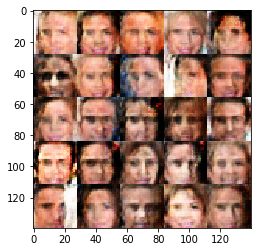

Epoch 1/2... Discriminator Loss: 1.2740... Generator Loss: 0.6723
Epoch 1/2... Discriminator Loss: 1.1811... Generator Loss: 1.0753
Epoch 1/2... Discriminator Loss: 1.7734... Generator Loss: 0.3445
Epoch 1/2... Discriminator Loss: 1.2328... Generator Loss: 0.7649
Epoch 1/2... Discriminator Loss: 1.2212... Generator Loss: 0.9635
Epoch 1/2... Discriminator Loss: 1.1298... Generator Loss: 0.9886
Epoch 1/2... Discriminator Loss: 1.2258... Generator Loss: 1.4095
Epoch 1/2... Discriminator Loss: 1.2877... Generator Loss: 1.3598
Epoch 1/2... Discriminator Loss: 1.1672... Generator Loss: 1.0661
Epoch 1/2... Discriminator Loss: 1.0859... Generator Loss: 1.1714


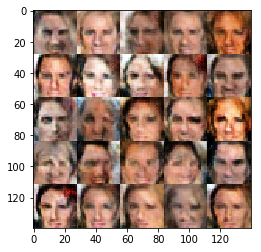

Epoch 1/2... Discriminator Loss: 1.3794... Generator Loss: 1.4425
Epoch 1/2... Discriminator Loss: 1.3920... Generator Loss: 1.6807
Epoch 1/2... Discriminator Loss: 1.2270... Generator Loss: 1.0537
Epoch 1/2... Discriminator Loss: 1.2193... Generator Loss: 0.9562
Epoch 1/2... Discriminator Loss: 1.2751... Generator Loss: 0.9980
Epoch 1/2... Discriminator Loss: 1.0566... Generator Loss: 1.0693
Epoch 1/2... Discriminator Loss: 1.4910... Generator Loss: 0.4800
Epoch 1/2... Discriminator Loss: 1.2916... Generator Loss: 1.1336
Epoch 1/2... Discriminator Loss: 1.6056... Generator Loss: 0.3959
Epoch 1/2... Discriminator Loss: 1.1588... Generator Loss: 0.8616


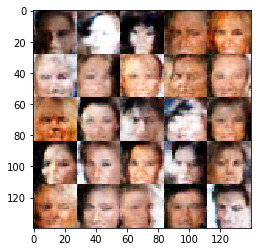

Epoch 1/2... Discriminator Loss: 1.3703... Generator Loss: 0.5673
Epoch 1/2... Discriminator Loss: 1.2327... Generator Loss: 0.9120
Epoch 1/2... Discriminator Loss: 1.1037... Generator Loss: 1.3157
Epoch 1/2... Discriminator Loss: 1.2030... Generator Loss: 0.9344
Epoch 1/2... Discriminator Loss: 1.2303... Generator Loss: 1.6981
Epoch 1/2... Discriminator Loss: 1.6602... Generator Loss: 0.3954
Epoch 1/2... Discriminator Loss: 1.2346... Generator Loss: 0.8309
Epoch 1/2... Discriminator Loss: 1.2409... Generator Loss: 0.7079
Epoch 2/2... Discriminator Loss: 1.1898... Generator Loss: 0.8239
Epoch 2/2... Discriminator Loss: 1.1164... Generator Loss: 1.1576


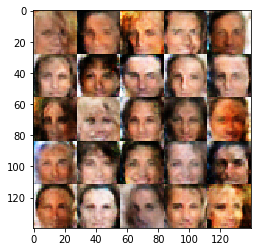

Epoch 2/2... Discriminator Loss: 1.1717... Generator Loss: 0.9307
Epoch 2/2... Discriminator Loss: 1.2196... Generator Loss: 1.3570
Epoch 2/2... Discriminator Loss: 1.1168... Generator Loss: 0.9785
Epoch 2/2... Discriminator Loss: 1.3172... Generator Loss: 2.0109
Epoch 2/2... Discriminator Loss: 1.4341... Generator Loss: 0.5709
Epoch 2/2... Discriminator Loss: 1.1230... Generator Loss: 1.1021
Epoch 2/2... Discriminator Loss: 1.3805... Generator Loss: 0.6558
Epoch 2/2... Discriminator Loss: 1.1440... Generator Loss: 0.9974
Epoch 2/2... Discriminator Loss: 1.2761... Generator Loss: 1.1041
Epoch 2/2... Discriminator Loss: 1.2028... Generator Loss: 0.9842


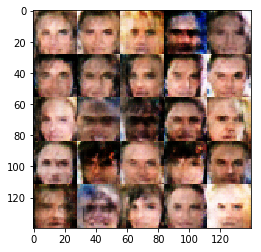

Epoch 2/2... Discriminator Loss: 1.2569... Generator Loss: 1.7297
Epoch 2/2... Discriminator Loss: 1.1712... Generator Loss: 1.2327
Epoch 2/2... Discriminator Loss: 1.2325... Generator Loss: 1.6999
Epoch 2/2... Discriminator Loss: 1.1436... Generator Loss: 0.9461
Epoch 2/2... Discriminator Loss: 1.3284... Generator Loss: 1.6759
Epoch 2/2... Discriminator Loss: 1.1407... Generator Loss: 1.3594
Epoch 2/2... Discriminator Loss: 1.8345... Generator Loss: 0.3317
Epoch 2/2... Discriminator Loss: 1.0685... Generator Loss: 1.0980
Epoch 2/2... Discriminator Loss: 1.2445... Generator Loss: 0.7848
Epoch 2/2... Discriminator Loss: 1.1748... Generator Loss: 1.0159


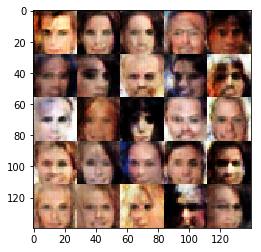

Epoch 2/2... Discriminator Loss: 1.1226... Generator Loss: 0.9215
Epoch 2/2... Discriminator Loss: 1.2813... Generator Loss: 1.9210
Epoch 2/2... Discriminator Loss: 1.2064... Generator Loss: 0.8738
Epoch 2/2... Discriminator Loss: 1.0412... Generator Loss: 1.8268
Epoch 2/2... Discriminator Loss: 1.2073... Generator Loss: 0.8037
Epoch 2/2... Discriminator Loss: 1.2363... Generator Loss: 1.5308
Epoch 2/2... Discriminator Loss: 1.2117... Generator Loss: 1.6583
Epoch 2/2... Discriminator Loss: 1.3750... Generator Loss: 0.5122
Epoch 2/2... Discriminator Loss: 1.1638... Generator Loss: 0.8225
Epoch 2/2... Discriminator Loss: 1.2020... Generator Loss: 0.9469
Epoch 2/2... Discriminator Loss: 1.1246... Generator Loss: 1.0458
Epoch 2/2... Discriminator Loss: 1.1479... Generator Loss: 1.3623
Epoch 2/2... Discriminator Loss: 2.0905... Generator Loss: 2.9775
Epoch 2/2... Discriminator Loss: 1.0599... Generator Loss: 1.1180
Epoch 2/2... Discriminator Loss: 1.1298... Generator Loss: 0.9949
Epoch 2/2.

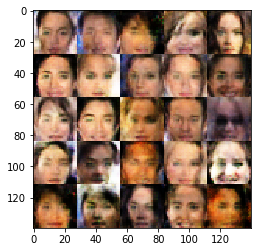

Epoch 2/2... Discriminator Loss: 1.1020... Generator Loss: 1.2541
Epoch 2/2... Discriminator Loss: 1.6306... Generator Loss: 2.7163
Epoch 2/2... Discriminator Loss: 1.0262... Generator Loss: 1.4025
Epoch 2/2... Discriminator Loss: 1.1587... Generator Loss: 1.1241
Epoch 2/2... Discriminator Loss: 1.0727... Generator Loss: 1.1893
Epoch 2/2... Discriminator Loss: 1.4188... Generator Loss: 0.5810
Epoch 2/2... Discriminator Loss: 1.2355... Generator Loss: 1.7382
Epoch 2/2... Discriminator Loss: 1.2015... Generator Loss: 0.6540
Epoch 2/2... Discriminator Loss: 1.1445... Generator Loss: 1.2416
Epoch 2/2... Discriminator Loss: 1.2117... Generator Loss: 0.6718


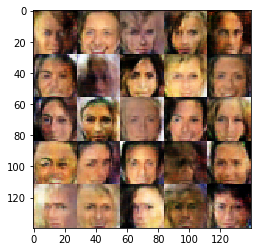

Epoch 2/2... Discriminator Loss: 1.3552... Generator Loss: 0.5330
Epoch 2/2... Discriminator Loss: 1.0901... Generator Loss: 1.1234
Epoch 2/2... Discriminator Loss: 1.2287... Generator Loss: 0.7722
Epoch 2/2... Discriminator Loss: 1.1663... Generator Loss: 0.9309
Epoch 2/2... Discriminator Loss: 1.5066... Generator Loss: 0.4355
Epoch 2/2... Discriminator Loss: 1.1431... Generator Loss: 1.2981
Epoch 2/2... Discriminator Loss: 1.3426... Generator Loss: 0.6064
Epoch 2/2... Discriminator Loss: 1.3447... Generator Loss: 0.5561
Epoch 2/2... Discriminator Loss: 1.0999... Generator Loss: 0.9150
Epoch 2/2... Discriminator Loss: 1.1901... Generator Loss: 1.5691


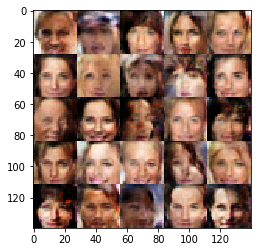

Epoch 2/2... Discriminator Loss: 1.0438... Generator Loss: 1.2163
Epoch 2/2... Discriminator Loss: 1.1761... Generator Loss: 1.3284
Epoch 2/2... Discriminator Loss: 1.0611... Generator Loss: 1.1355
Epoch 2/2... Discriminator Loss: 1.0882... Generator Loss: 0.9205
Epoch 2/2... Discriminator Loss: 1.4563... Generator Loss: 0.5313
Epoch 2/2... Discriminator Loss: 1.0626... Generator Loss: 1.2563
Epoch 2/2... Discriminator Loss: 1.6467... Generator Loss: 2.5028
Epoch 2/2... Discriminator Loss: 1.0918... Generator Loss: 1.0609
Epoch 2/2... Discriminator Loss: 1.2098... Generator Loss: 1.7322
Epoch 2/2... Discriminator Loss: 1.0426... Generator Loss: 1.6652


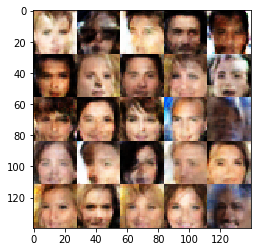

Epoch 2/2... Discriminator Loss: 0.9963... Generator Loss: 1.5343
Epoch 2/2... Discriminator Loss: 1.0575... Generator Loss: 1.3420
Epoch 2/2... Discriminator Loss: 1.0556... Generator Loss: 1.2487
Epoch 2/2... Discriminator Loss: 1.7764... Generator Loss: 2.4020
Epoch 2/2... Discriminator Loss: 1.0206... Generator Loss: 1.7307
Epoch 2/2... Discriminator Loss: 1.4798... Generator Loss: 0.4511
Epoch 2/2... Discriminator Loss: 1.2283... Generator Loss: 0.9257
Epoch 2/2... Discriminator Loss: 1.1844... Generator Loss: 1.7920
Epoch 2/2... Discriminator Loss: 1.1099... Generator Loss: 0.9479
Epoch 2/2... Discriminator Loss: 1.5936... Generator Loss: 2.5295


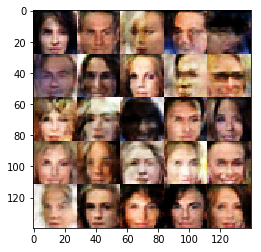

Epoch 2/2... Discriminator Loss: 1.0734... Generator Loss: 0.9232
Epoch 2/2... Discriminator Loss: 1.3242... Generator Loss: 0.5306
Epoch 2/2... Discriminator Loss: 1.0329... Generator Loss: 1.1107
Epoch 2/2... Discriminator Loss: 1.0895... Generator Loss: 0.7709
Epoch 2/2... Discriminator Loss: 0.9595... Generator Loss: 1.4213
Epoch 2/2... Discriminator Loss: 1.2328... Generator Loss: 0.7031
Epoch 2/2... Discriminator Loss: 1.6448... Generator Loss: 0.3643
Epoch 2/2... Discriminator Loss: 1.0257... Generator Loss: 1.2058
Epoch 2/2... Discriminator Loss: 1.0256... Generator Loss: 1.2957
Epoch 2/2... Discriminator Loss: 1.3429... Generator Loss: 0.5714


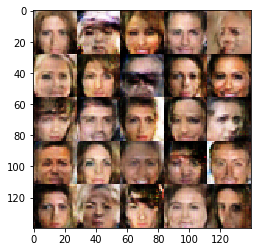

Epoch 2/2... Discriminator Loss: 1.0145... Generator Loss: 1.1004
Epoch 2/2... Discriminator Loss: 1.0286... Generator Loss: 1.2029
Epoch 2/2... Discriminator Loss: 1.0035... Generator Loss: 1.2068
Epoch 2/2... Discriminator Loss: 0.9838... Generator Loss: 1.3395
Epoch 2/2... Discriminator Loss: 1.1141... Generator Loss: 0.8627
Epoch 2/2... Discriminator Loss: 1.2316... Generator Loss: 2.0407
Epoch 2/2... Discriminator Loss: 0.9904... Generator Loss: 1.1511
Epoch 2/2... Discriminator Loss: 1.0419... Generator Loss: 1.2621
Epoch 2/2... Discriminator Loss: 0.9913... Generator Loss: 1.5347
Epoch 2/2... Discriminator Loss: 1.2869... Generator Loss: 0.7082


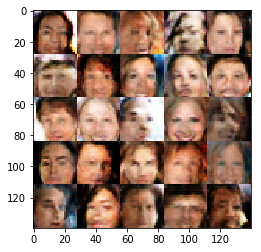

Epoch 2/2... Discriminator Loss: 1.1866... Generator Loss: 1.5011
Epoch 2/2... Discriminator Loss: 1.3095... Generator Loss: 2.2895
Epoch 2/2... Discriminator Loss: 1.0789... Generator Loss: 0.8674
Epoch 2/2... Discriminator Loss: 0.9796... Generator Loss: 1.4800
Epoch 2/2... Discriminator Loss: 1.1661... Generator Loss: 2.0931
Epoch 2/2... Discriminator Loss: 1.0177... Generator Loss: 1.0055
Epoch 2/2... Discriminator Loss: 1.1031... Generator Loss: 1.6714
Epoch 2/2... Discriminator Loss: 0.9926... Generator Loss: 1.0975
Epoch 2/2... Discriminator Loss: 1.2942... Generator Loss: 2.4314
Epoch 2/2... Discriminator Loss: 0.8362... Generator Loss: 1.2876


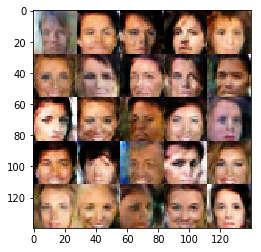

Epoch 2/2... Discriminator Loss: 1.2460... Generator Loss: 0.7466
Epoch 2/2... Discriminator Loss: 0.9488... Generator Loss: 1.4485
Epoch 2/2... Discriminator Loss: 1.1486... Generator Loss: 1.9997
Epoch 2/2... Discriminator Loss: 1.0817... Generator Loss: 0.7654
Epoch 2/2... Discriminator Loss: 1.4302... Generator Loss: 0.4880
Epoch 2/2... Discriminator Loss: 0.9678... Generator Loss: 1.2777
Epoch 2/2... Discriminator Loss: 0.9783... Generator Loss: 1.2810
Epoch 2/2... Discriminator Loss: 1.1390... Generator Loss: 2.1482
Epoch 2/2... Discriminator Loss: 1.1220... Generator Loss: 2.1124
Epoch 2/2... Discriminator Loss: 1.2098... Generator Loss: 0.6473


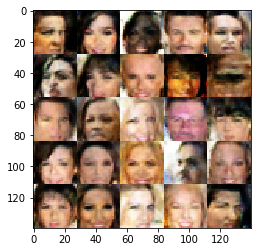

Epoch 2/2... Discriminator Loss: 0.9692... Generator Loss: 1.0064
Epoch 2/2... Discriminator Loss: 1.3354... Generator Loss: 0.5679
Epoch 2/2... Discriminator Loss: 1.4258... Generator Loss: 0.5058
Epoch 2/2... Discriminator Loss: 1.1150... Generator Loss: 0.7928
Epoch 2/2... Discriminator Loss: 1.0645... Generator Loss: 1.9657
Epoch 2/2... Discriminator Loss: 0.9622... Generator Loss: 1.7436
Epoch 2/2... Discriminator Loss: 1.7543... Generator Loss: 3.3560
Epoch 2/2... Discriminator Loss: 0.9490... Generator Loss: 1.0413
Epoch 2/2... Discriminator Loss: 1.0460... Generator Loss: 0.8099
Epoch 2/2... Discriminator Loss: 0.9761... Generator Loss: 1.0966


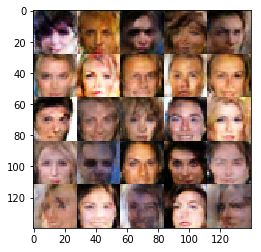

Epoch 2/2... Discriminator Loss: 0.9010... Generator Loss: 1.8236
Epoch 2/2... Discriminator Loss: 1.0344... Generator Loss: 1.1760
Epoch 2/2... Discriminator Loss: 1.2684... Generator Loss: 2.4588
Epoch 2/2... Discriminator Loss: 0.9371... Generator Loss: 1.2244
Epoch 2/2... Discriminator Loss: 0.8938... Generator Loss: 1.5452
Epoch 2/2... Discriminator Loss: 1.0702... Generator Loss: 1.7968
Epoch 2/2... Discriminator Loss: 1.0301... Generator Loss: 0.9538
Epoch 2/2... Discriminator Loss: 1.0162... Generator Loss: 1.1027
Epoch 2/2... Discriminator Loss: 0.9219... Generator Loss: 1.6724
Epoch 2/2... Discriminator Loss: 0.9303... Generator Loss: 1.9145


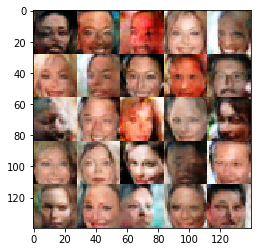

Epoch 2/2... Discriminator Loss: 0.9686... Generator Loss: 1.7860
Epoch 2/2... Discriminator Loss: 1.0707... Generator Loss: 0.9462
Epoch 2/2... Discriminator Loss: 0.9079... Generator Loss: 1.1495
Epoch 2/2... Discriminator Loss: 1.0312... Generator Loss: 0.8309
Epoch 2/2... Discriminator Loss: 0.9515... Generator Loss: 1.9322
Epoch 2/2... Discriminator Loss: 1.0735... Generator Loss: 2.2603
Epoch 2/2... Discriminator Loss: 1.1605... Generator Loss: 0.7748
Epoch 2/2... Discriminator Loss: 0.8818... Generator Loss: 1.3699
Epoch 2/2... Discriminator Loss: 0.9511... Generator Loss: 2.1325
Epoch 2/2... Discriminator Loss: 0.9059... Generator Loss: 1.3537


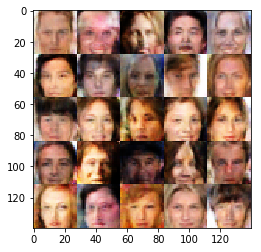

Epoch 2/2... Discriminator Loss: 1.0546... Generator Loss: 0.9044
Epoch 2/2... Discriminator Loss: 0.8407... Generator Loss: 1.4922
Epoch 2/2... Discriminator Loss: 0.8469... Generator Loss: 1.8388
Epoch 2/2... Discriminator Loss: 0.9221... Generator Loss: 1.0532
Epoch 2/2... Discriminator Loss: 1.1735... Generator Loss: 0.6956
Epoch 2/2... Discriminator Loss: 0.8223... Generator Loss: 1.4398


In [ ]:
batch_size = 128
z_dim = 64
learning_rate = 0.0012
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.